# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# WeatherPy
## Starter Code to Generate Random Geographic Coordinates and a List of Cities
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import numpy as np
from citipy import citipy

In [4]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
        # Run an API request for each of the cities
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=hadithah
Processing Record 1 of Set 1 | hadithah
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=hermanus
Processing Record 2 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=edinburgh of the seven seas
Processing Record 3 of Set 1 | edinburgh of the seven seas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=georgetown
Processing Record 4 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=usinsk
Processing Record 5 of Set 1 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=grytviken
Processing Record 6 of Set 1 | grytviken
http:

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=taiohae
Processing Record 3 of Set 2 | taiohae
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=la'ie
Processing Record 4 of Set 2 | la'ie
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=sabha
Processing Record 5 of Set 2 | sabha
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=laguna
Processing Record 6 of Set 2 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=nili
Processing Record 7 of Set 2 | nili
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=burutu
Processing Record 8 of Set 2 | burutu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=e

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=egilsstadir
Processing Record 8 of Set 3 | egilsstadir
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=winburg
Processing Record 9 of Set 3 | winburg
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=badger
Processing Record 10 of Set 3 | badger
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=whitehorse
Processing Record 11 of Set 3 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=mount pearl
Processing Record 12 of Set 3 | mount pearl
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=hirara
Processing Record 13 of Set 3 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a9

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=cabo san lucas
Processing Record 12 of Set 4 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=acarau
Processing Record 13 of Set 4 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=kununurra
Processing Record 14 of Set 4 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=auki
Processing Record 15 of Set 4 | auki
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=fortuna
Processing Record 16 of Set 4 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=saipan
Processing Record 17 of Set 4 | saipan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=sumbawa besar
Processing Record 15 of Set 5 | sumbawa besar
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=klyuchi
Processing Record 16 of Set 5 | klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=vorgashor
Processing Record 17 of Set 5 | vorgashor
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=arraial do cabo
Processing Record 18 of Set 5 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=santo antonio
Processing Record 19 of Set 5 | santo antonio
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=luanda
Processing Record 20 of Set 5 | luanda
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPI

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=salinopolis
Processing Record 19 of Set 6 | salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=sechura
Processing Record 20 of Set 6 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=rabo de peixe
Processing Record 21 of Set 6 | rabo de peixe
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=ar ruways
Processing Record 22 of Set 6 | ar ruways
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=bambanglipuro
Processing Record 23 of Set 6 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=mont-dore
Processing Record 24 of Set 6 | mont-dore
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=kandi
Processing Record 23 of Set 7 | kandi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=regina
Processing Record 24 of Set 7 | regina
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=paita
Processing Record 25 of Set 7 | paita
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=tamanrasset
Processing Record 26 of Set 7 | tamanrasset
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=nizhneudinsk
Processing Record 27 of Set 7 | nizhneudinsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=kalmunai
Processing Record 28 of Set 7 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a945

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=ixtapa
Processing Record 27 of Set 8 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=antigonish
Processing Record 28 of Set 8 | antigonish
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=daru
Processing Record 29 of Set 8 | daru
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=nizhnyaya omka
Processing Record 30 of Set 8 | nizhnyaya omka
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=box elder
Processing Record 31 of Set 8 | box elder
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=yazoo city
Processing Record 32 of Set 8 | yazoo city
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812d

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=plastun
Processing Record 31 of Set 9 | plastun
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=general mosconi
Processing Record 32 of Set 9 | general mosconi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=fort bragg
Processing Record 33 of Set 9 | fort bragg
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=waingapu
Processing Record 34 of Set 9 | waingapu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=palanga
Processing Record 35 of Set 9 | palanga
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=maridi
Processing Record 36 of Set 9 | maridi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812d

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=crane
Processing Record 35 of Set 10 | crane
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=kasongo-lunda
Processing Record 36 of Set 10 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=iskateley
Processing Record 37 of Set 10 | iskateley
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=banda aceh
Processing Record 38 of Set 10 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=anna regina
Processing Record 39 of Set 10 | anna regina
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=traiguen
Processing Record 40 of Set 10 | traiguen
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec8

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=nikolayevsk-on-amure
Processing Record 38 of Set 11 | nikolayevsk-on-amure
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=jose mariano jimenez
Processing Record 39 of Set 11 | jose mariano jimenez
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=labrador city
Processing Record 40 of Set 11 | labrador city
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=mahavelona
Processing Record 41 of Set 11 | mahavelona
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=aksu
Processing Record 42 of Set 11 | aksu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=mary
Processing Record 43 of Set 11 | mary
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=coahuayana de hidalgo
Processing Record 41 of Set 12 | coahuayana de hidalgo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=san luis de la loma
Processing Record 42 of Set 12 | san luis de la loma
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=petropavlovsk-kamchatsky
Processing Record 43 of Set 12 | petropavlovsk-kamchatsky
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=vanino
Processing Record 44 of Set 12 | vanino
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=papao
Processing Record 45 of Set 12 | papao
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c93ec82b5e1376812dc166a980a94500&q=aripuana
Processing Record 46 of Set 12 | aripuana
http://api.openwea

In [5]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.count()
print(record_count)

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadithah,34.1397,42.3781,26.39,44,55,4.31,IQ,1684970923
1,hermanus,-34.4187,19.2345,14.89,70,21,5.28,ZA,1684970924
2,edinburgh of the seven seas,-37.0676,-12.3116,14.63,68,79,11.77,SH,1684970924
3,georgetown,5.4112,100.3354,28.86,82,20,1.03,MY,1684970924
4,usinsk,65.9939,57.5281,14.98,68,85,3.31,RU,1684970897


In [7]:
import requests
import os
import pandas as pd

# Rest of your code...

# Create the 'output_data' directory if it doesn't exist
os.makedirs('output_data', exist_ok=True)
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadithah,34.1397,42.3781,26.39,44,55,4.31,IQ,1684970923
1,hermanus,-34.4187,19.2345,14.89,70,21,5.28,ZA,1684970924
2,edinburgh of the seven seas,-37.0676,-12.3116,14.63,68,79,11.77,SH,1684970924
3,georgetown,5.4112,100.3354,28.86,82,20,1.03,MY,1684970924
4,usinsk,65.9939,57.5281,14.98,68,85,3.31,RU,1684970897


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

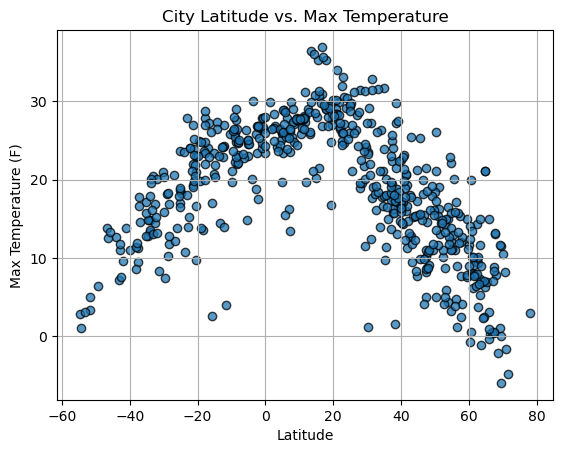

In [9]:
### Create the Scatter Plots Requested
#### Latitude Vs. Temperature
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

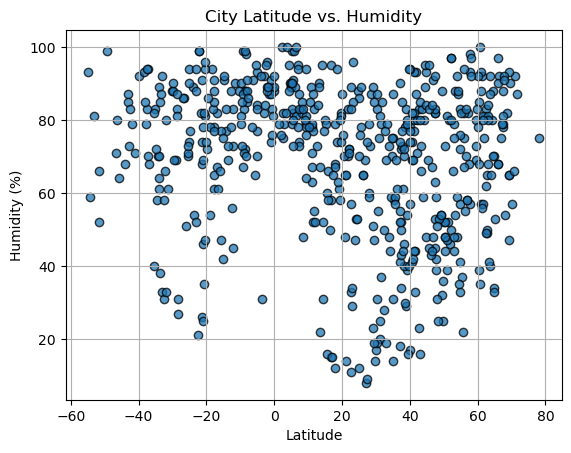

In [10]:
#### Latitude Vs. Humidity
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

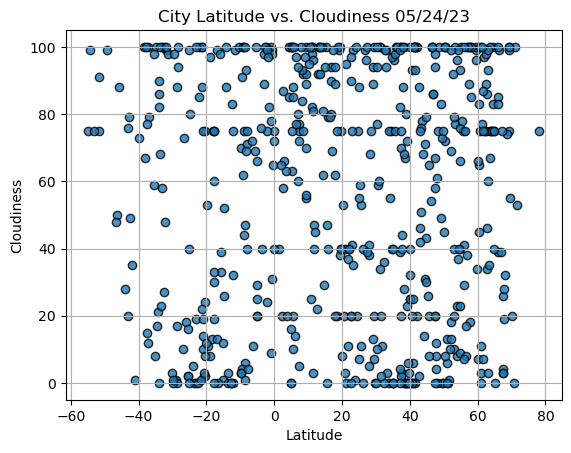

In [35]:
# Define or import the city_data_df variable
# city_data_df = ...  # Define or import city_data_df with necessary data

lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Build the scatter plot for latitude vs. wind speed
plt.scatter(lat, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

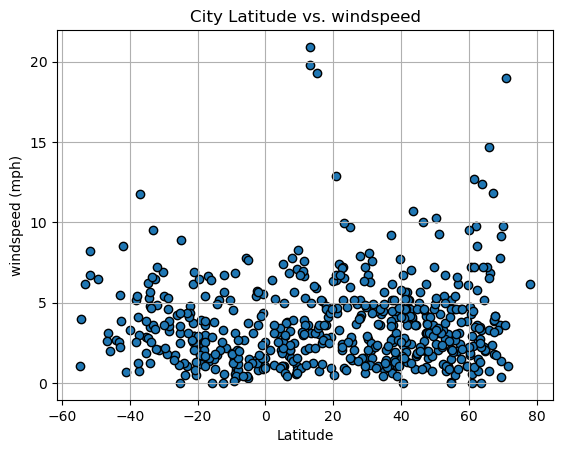

In [12]:
#### Latitude vs. Wind Speed Plot
# Build the scatter plots for latitude vs. wind speed
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")


# Set the title and labels
plt.title("City Latitude vs. windspeed")
plt.xlabel("Latitude")
plt.ylabel("windspeed (mph)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Define a function to create Linear Regression plots
# YOUR CODE HERE
## Requirement 2: Compute Linear Regression for Each Relationship
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_file):
    """
    Creates a linear regression plot for the given x and y values.
    
    Parameters:
    x_values (array-like): The x-axis values.
    y_values (array-like): The y-axis values.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str): Title of the plot.
    save_file (str): File name to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate the regression line
    regression_line = slope * x_values + intercept
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolor="black")
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Set the grid
    plt.grid(True)
    
    # Save the figure
    plt.savefig(save_file)
    
    # Show the plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadithah,34.1397,42.3781,26.39,44,55,4.31,IQ,1684970923
3,georgetown,5.4112,100.3354,28.86,82,20,1.03,MY,1684970924
4,usinsk,65.9939,57.5281,14.98,68,85,3.31,RU,1684970897
6,akbarabad,29.2464,52.7793,21.79,23,94,1.56,IR,1684970925
8,tazovsky,67.4667,78.7000,0.39,88,4,1.83,RU,1684970925


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,14.89,70,21,5.28,ZA,1684970924
2,edinburgh of the seven seas,-37.0676,-12.3116,14.63,68,79,11.77,SH,1684970924
5,grytviken,-54.2811,-36.5092,1.07,59,99,3.98,GS,1684970924
7,adamstown,-25.0660,-130.1015,23.68,74,99,3.12,PN,1684970925
11,atafu village,-8.5421,-172.5159,27.61,72,47,0.80,TK,1684970926


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
from scipy import stats

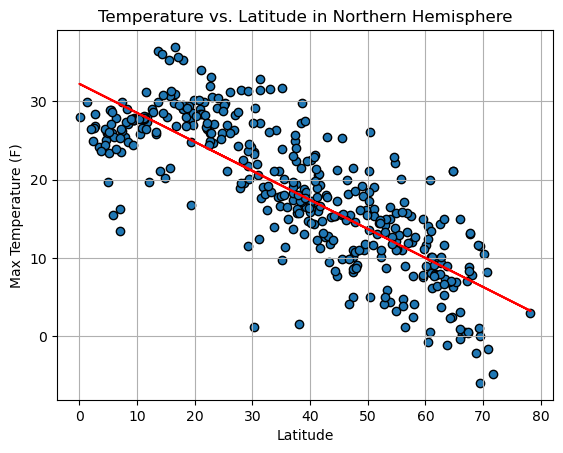

In [24]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                              'Latitude', 'Max Temperature (F)', 
                              'Temperature vs. Latitude in Northern Hemisphere', 
                              'northern_regression.png')

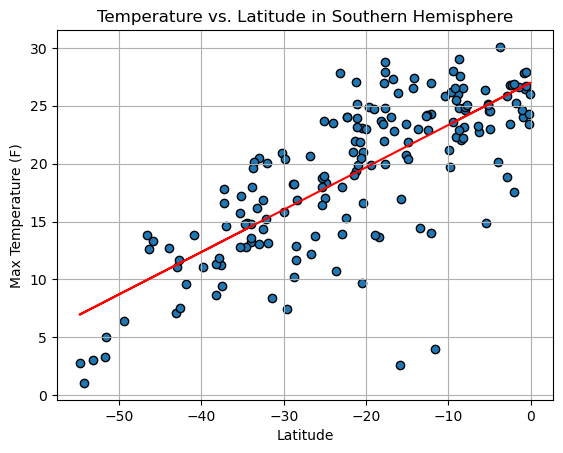

In [25]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                              'Latitude', 'Max Temperature (F)', 
                              'Temperature vs. Latitude in Southern Hemisphere', 
                              'southern_regression.png')
                              

**Discussion about the linear relationship:** Here we can observe correlation between temperature vs latitude in Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

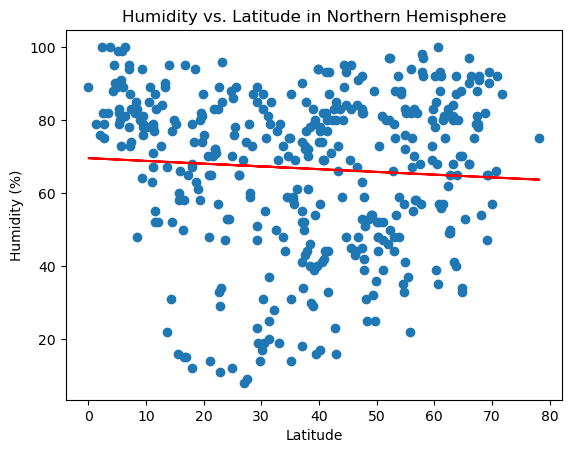

The r-value is: -0.06678732943249126


In [26]:
# Northern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
# YOUR CODE HERE
# Humidity vs. Latitude Linear Regression Plot
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in Northern Hemisphere')

# Save the plot
plt.savefig('northern_humidity_regression.png')

# Show the plot
plt.show()
# Show the r-value
print("The r-value is:", rvalue)

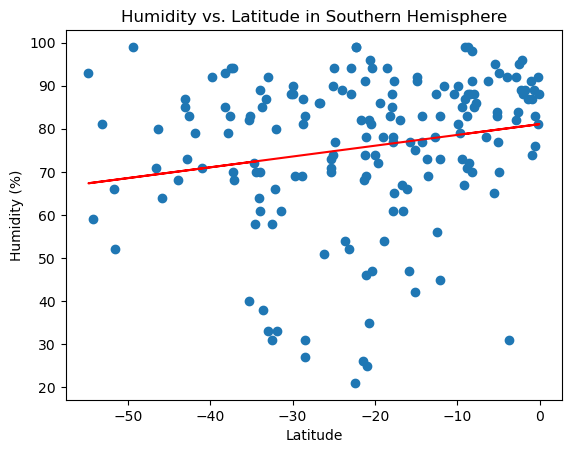

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere
# YOUR CODE HERE

# Humidity vs. Latitude Linear Regression Plot
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in Southern Hemisphere')

# Save the plot
plt.savefig('southern_humidity_regression.png')

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

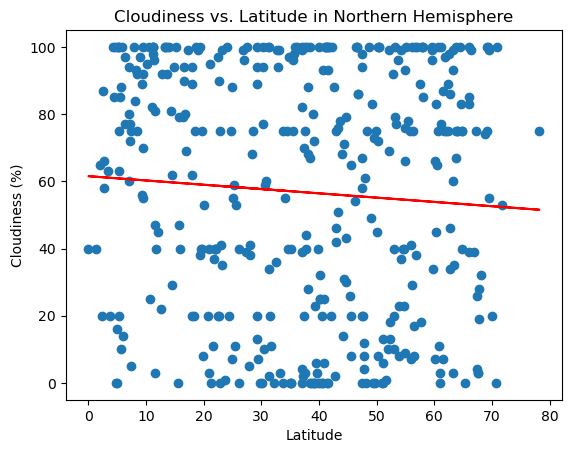

The r-value is: -0.06838787866141559


In [28]:
### Cloudiness vs. Latitude Linear Regression Plot
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

northern_hemi_df = pd.DataFrame(northern_hemi_df)

# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Remove NaNs from y_values
y_values = y_values.dropna()

# Convert y_values to numeric type (if necessary)
y_values = pd.to_numeric(y_values, errors='coerce')

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude in Northern Hemisphere')

# Save the plot
plt.savefig('northern_cloudiness_regression.png')

# Show the plot
plt.show()

# Show the r-value
print("The r-value is:", rvalue)


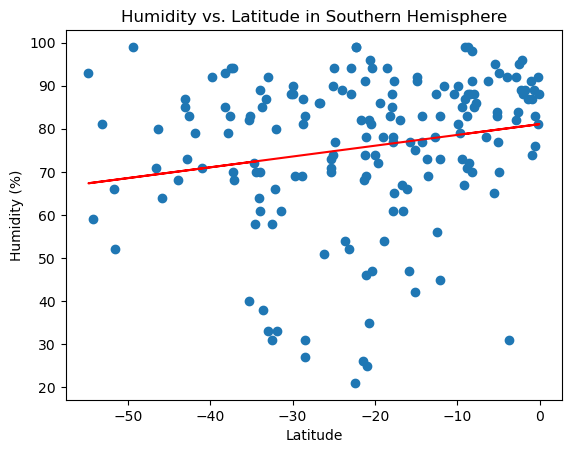

The r-value is: 0.1954745000940083


In [29]:
# Southern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere
# YOUR CODE HERE
# r-value also print
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in Southern Hemisphere')

# Save the plot
plt.savefig('southern_humidity_regression.png')

# Show the plot
plt.show()

# Show the r-value
print("The r-value is:", rvalue)

**Discussion about the linear relationship:** There is some correlation and as professor saod 0.19 shows weak correlation here

### Wind Speed vs. Latitude Linear Regression Plot

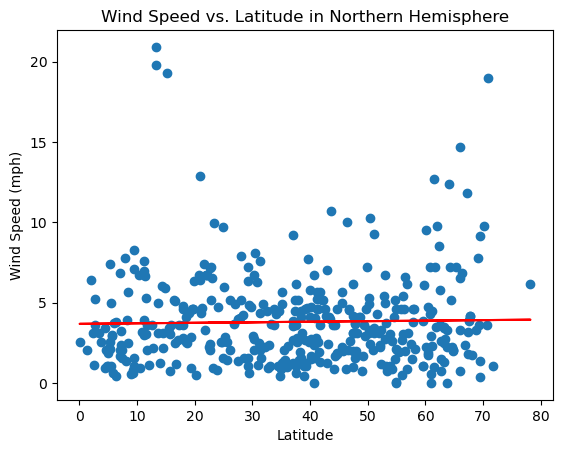

The r-value is: 0.022165376993406
The r-value is: 0.022165376993406


In [33]:
### Wind Speed vs. Latitude Linear Regression Plot
# Wind Speed vs. Latitude Linear Regression Plot
# Northern Hemisphere

# Define x_values using the Latitude column
x_values = northern_hemi_df['Lat']

# Make sure to use the correct column name
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs. Latitude in Northern Hemisphere')

# Save the plot
plt.savefig('northern_windspeed_regression.png')

# Show the plot
plt.show()

# Show the r-value
print("The r-value is:", rvalue)

# Show the r-value
print("The r-value is:", rvalue)


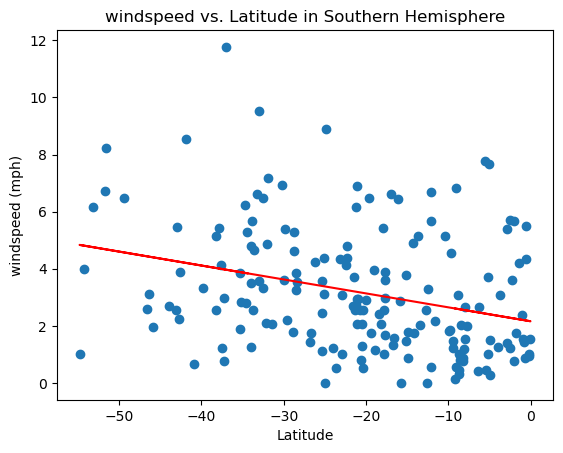

The r-value is: -0.30311947604129225


In [31]:
# Southern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere
# YOUR CODE HERE# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('windspeed (mph)')
plt.title('windspeed vs. Latitude in Southern Hemisphere')

# Save the plot
plt.savefig('southern_windspeed_regression.png')

# Show the plot
plt.show()

# Show the r-value
print("The r-value is:", rvalue)

**Discussion about the linear relationship:** There seems to be a negative correlation between windspeed and latitude in Southren Hemisphere